# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$d_w Q = -2 (y - Xw)^TX dw \Longrightarrow \nabla_w Q = -2((y - Xw)^TX)^T = -2X^T (y - Xw)$\
Плюс домножаем на $\frac{1}{l}$. Получаем:
$$\nabla_w Q = \frac{-2}{l}X^T (y - Xw)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.




### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k+1} = \dfrac{m_{k+1}}{1 - \beta_1^{k+1}}, \quad \widehat{v}_{k+1} = \dfrac{v_{k+1}}{1 - \beta_2^{k+1}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

print(max_iter, len(regression.loss_history))
assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

10 11


Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:
https://contest.yandex.ru/contest/29933/run-report/55362068/


* **StochasticDescent**:
https://contest.yandex.ru/contest/29933/run-report/55362080/


* **MomentumDescent**:
https://contest.yandex.ru/contest/29933/run-report/55362118/


* **Adam**:
https://contest.yandex.ru/contest/29933/run-report/55362149/


* **LinearRegression**:
https://contest.yandex.ru/contest/29933/run-report/55373183/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('data/autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [9]:
data.dtypes, data.shape

(brand                object
 model                object
 vehicleType          object
 gearbox              object
 fuelType             object
 notRepairedDamage    object
 powerPS               int64
 kilometer             int64
 autoAgeMonths         int64
 price                 int64
 dtype: object, (241190, 10))

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [10]:
print(data['price'].unique().shape)
data['price'].describe()

(4919,)


count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

# Работа с выбросами.

Минимальное и максимальные значения по всей видимости являются выбросами. Их надо будет потом выкинуть. Кроме того, видим большой отрыв между верхним квартилем и максимумом.

С другой стороны, слишком маленькое значение цены может быть аукционным, но это сложно предугадать, поэтому такие значения я буду расценивать как выбросы.

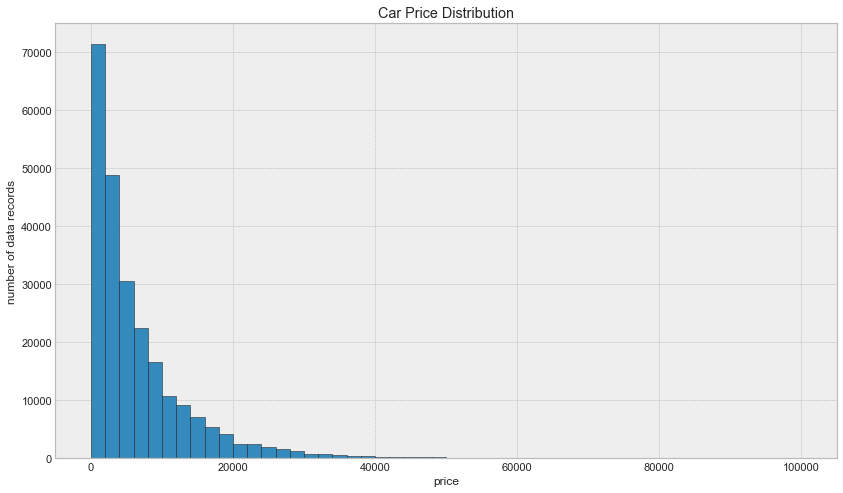

In [11]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 14, 8
plt.hist(data['price'].values, bins=50, edgecolor = 'k')
plt.xlabel('price')
plt.ylabel('number of data records')
plt.title('Car Price Distribution')
plt.show()

Имеем распределение с тяжелым хвостом, что означает возможность наличия выбросов. Проверим ручками.

In [12]:
data[data['price'] == data['price'].max()]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
92147,nissan,x_trail,suv,manuell,diesel,nein,114,150000,175,99999
96067,porsche,911,cabrio,automatik,benzin,nein,400,20000,33,99999
204347,porsche,911,coupe,manuell,benzin,ja,325,150000,142,99999
222159,smart,fortwo,kleinwagen,automatik,benzin,nein,71,50000,78,99999


In [13]:
data[data['price'] == data['price'].min()]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
47,mercedes_benz,e_klasse,limousine,manuell,diesel,nein,113,150000,252,1
167,audi,80,limousine,manuell,benzin,nein,90,70000,309,1
649,opel,omega,kombi,manuell,benzin,nein,136,150000,219,1
1291,jaguar,x_type,limousine,automatik,diesel,nein,241,30000,31,1
1780,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,214,1
...,...,...,...,...,...,...,...,...,...,...
237269,volkswagen,polo,kleinwagen,manuell,benzin,nein,55,150000,237,1
239537,opel,astra,coupe,automatik,benzin,nein,102,150000,195,1
240184,nissan,andere,bus,manuell,diesel,ja,101,150000,134,1
240209,volkswagen,polo,kleinwagen,manuell,benzin,nein,125,150000,208,1


Да, определенно, выбросы есть.

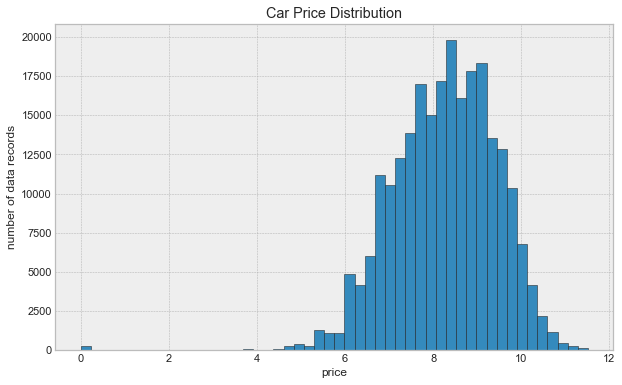

In [14]:
plt.rcParams['figure.figsize'] = 10, 6
plt.hist(np.log(data['price']).values, bins=50, edgecolor = 'k')
plt.xlabel('price')
plt.ylabel('number of data records')
plt.title('Car Price Distribution')
plt.show()

In [15]:
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

Зато нету NaN-ов, и это хорошо. Выбросим выбросы из данных. Срежем по 1% слева и 0.5% справа по квантилям.

In [16]:
data['price'].quantile(0.01), data['price'].quantile(0.99)

(250.0, 37900.0)

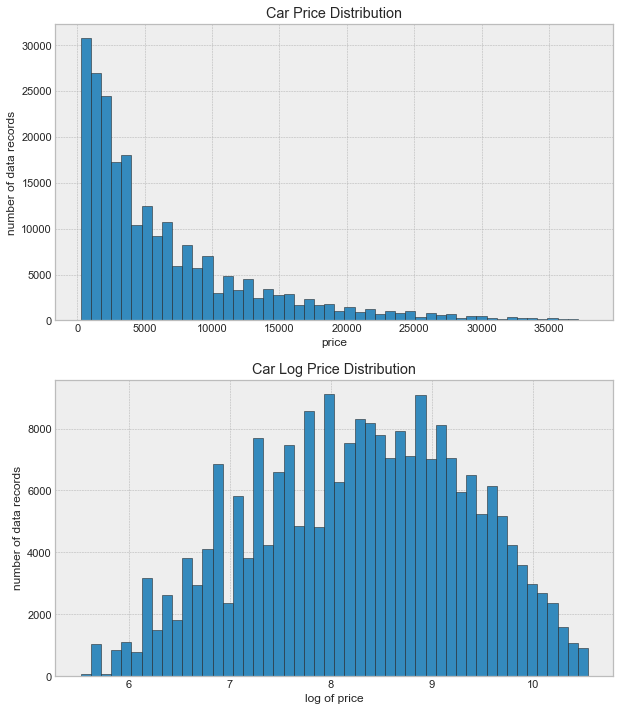

In [17]:
data.drop(data[(data['price'] <= data['price'].quantile(0.01)) |
               (data['price'] >= data['price'].quantile(0.99))].index, inplace=True)

def draw_hists():
    fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

    ax1.hist(data['price'].values, bins=50, edgecolor = 'k')
    ax1.set_xlabel('price')
    ax1.set_ylabel('number of data records')
    ax1.set_title('Car Price Distribution')

    ax2.hist(np.log(data['price']).values, bins=50, edgecolor = 'k')
    ax2.set_xlabel('log of price')
    ax2.set_ylabel('number of data records')
    ax2.set_title('Car Log Price Distribution')

    plt.show()
    
draw_hists()

Выглядит получше, но выбросы все равно есть. Посмотрим, что мы еще можем сделать.

In [18]:
data['price'].value_counts().sort_index().head()

251     2
252     1
253     1
255     1
260    11
Name: price, dtype: int64

In [19]:
data['price'].quantile(0.03)

500.0

Уберем еще 3% слева.

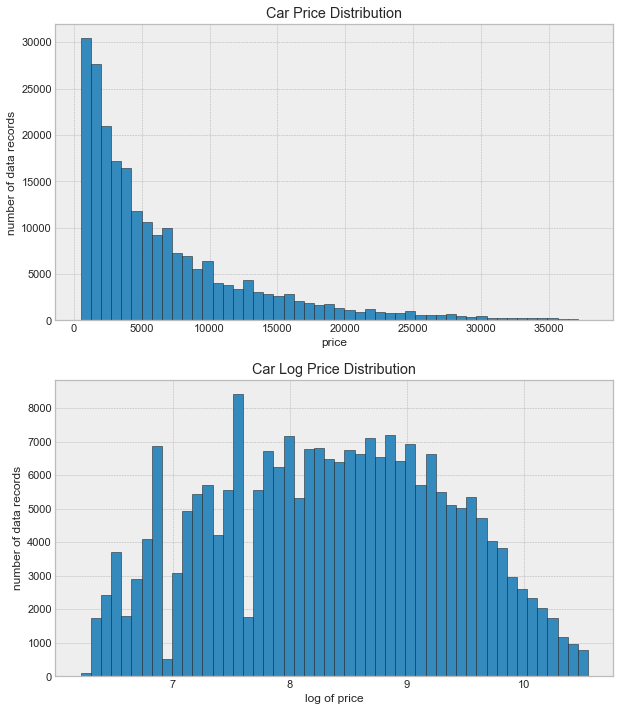

In [20]:
data.drop(data[(data['price'] <= data['price'].quantile(0.03))].index, inplace=True)
draw_hists()

Выглядит намного лучше, но можно срезать еще немного справа.

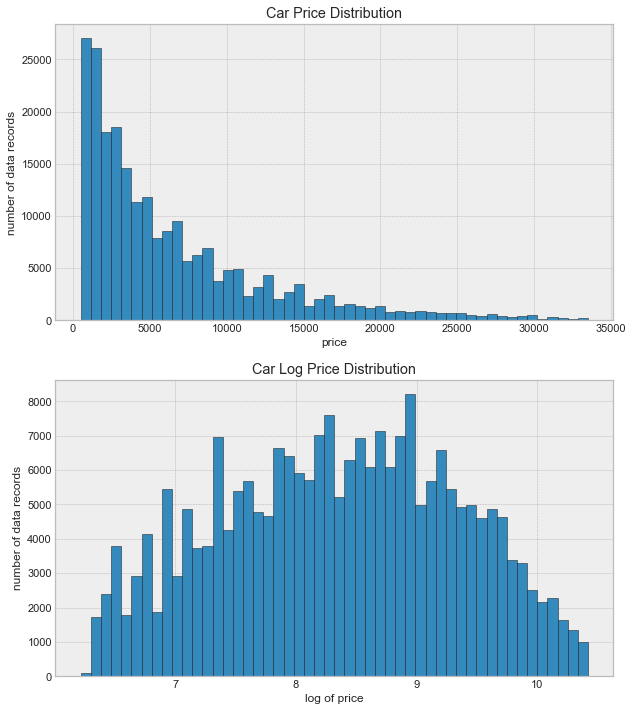

In [21]:
data.drop(data[(data['price'] >= data['price'].quantile(0.995))].index, inplace=True)
draw_hists()

# Работа с числовыми (и бинарными) признаками.

Я хочу вынести бинарные признаки отдельно. Посмотрим, есть ли еще таковые.

Возможно, прикольной идеей было бы накинуть к пробегу еще 5-10% (возможно, через равномерное распределение) в тренировочной выборке, так как люди часто скручивают пробег, чтобы продать автомобиль подороже). Однако это кажется очень плохой идеей.

In [22]:
data['gearbox'].unique(), data['fuelType'].unique()

(array(['manuell', 'automatik'], dtype=object),
 array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
       dtype=object))

Выходит, у нас два бинарных признака: тип КПП и `notRepairedDamage`. Заполним их значениями 0 и 1.

In [23]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [24]:
# 0, если поломок нет и 1 иначе
# 0, если механика и 1 иначе
data['notRepairedDamage'] = (data['notRepairedDamage'] != 'nein').astype(int)
data['gearbox']  = (data['gearbox'] != 'manuell').astype(int)
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,0,benzin,0,75,150000,177,1500
1,skoda,fabia,kleinwagen,0,diesel,0,69,90000,93,3600
2,bmw,3er,limousine,0,benzin,1,102,150000,246,650
3,peugeot,2_reihe,cabrio,0,benzin,0,109,150000,140,2200
4,mazda,3_reihe,limousine,0,benzin,0,105,150000,136,2000


In [25]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage', 'gearbox']

Очень хорошим признаком является тип КПП, так как автомобили на автомате дороже, чем автомобили на механике. Кроме того, признак бренда тоже полезен, так как никто не отменял наценку за значок на капоте. Касаемо модели автомобиля - я не уверен, здесь большую роль играет конфигурация модели. Возможно, тип топлива также может быть полезен (наверняка электромобили (и гибриды) будут дороже). Очевидно, другие признаки (пробег, возраст, мощность, наличие помолок) тоже вносят существенный вес в формирование цены. При этом пробег, возраст имеют отрицательную корреляцию с таргетом, мощность - положительную. Построим графики корреляции и проверим мои предположения.

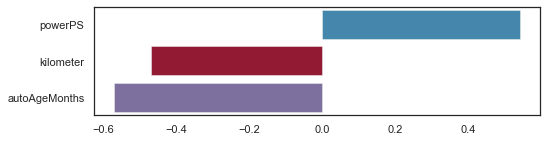

In [26]:
plt.style.use('seaborn-ticks')
correlations = data[numeric].corrwith(data['price']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(8, 2)

Тут я не ошибся. Смотрим по бинарным.

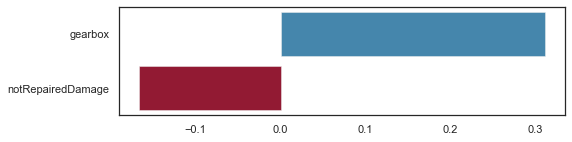

In [27]:
correlations = data[other].corrwith(data['price']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(8, 2)

Тоже верно сказал. Автомат (значение 1) повышает цену. Наличие поломок (значение 1) снижает цену. Кстати, если инверсировать значения, то знаки корреляций поменяются.

Возможно, если машину слишком *интенсивно* использовали, то это тоже скажется на цене. Добавим еще один числовой признак как отношение пробега к сроку эксплуатации.

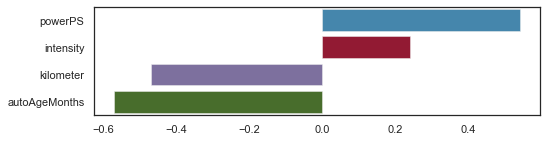

In [28]:
data['intensity'] = data.kilometer / data.autoAgeMonths
correlations = data[numeric + ['intensity']].corrwith(data['price']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(8, 2)

Признак оказался плохим. Удаляем.

In [29]:
data.drop(columns='intensity', inplace=True)

Уже после проверки задания мне подсказали: "в `autoAgeMonths, например`, есть 2 линейных тренда, и лучше разделить данный признак на 2 по порогу". Давайте посмотрим на этот признак.

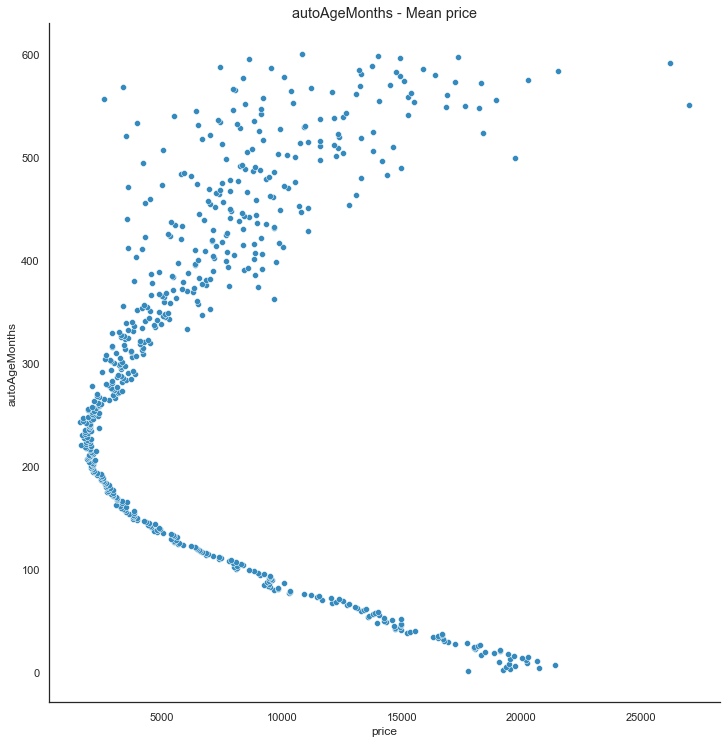

In [30]:
dfg_ = data.groupby(['autoAgeMonths'], as_index=False)['price'].mean()
sns.relplot(y='autoAgeMonths', x='price', data=dfg_, height=10, aspect=1)
plt.title('autoAgeMonths - Mean price')
plt.show()

На мое удивление, такой признак действительно имеется. По всей видимости, я не учел того, что довольно старые автомобили считаются раритетными, из-за чего их цена как правило больше. В нашей случае пороговый возраст - 200 месяцев. Давайте добавим новый бинарный признак `rarity`, отвечающий за раритетность авто.

In [31]:
data['rarity'] = (data['autoAgeMonths'] > 200).astype(int)
data.sample(10)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,rarity
189773,volkswagen,golf,kombi,1,benzin,0,125,30000,17,19900,0
44663,mercedes_benz,c_klasse,limousine,0,diesel,0,122,150000,145,5800,0
20461,volkswagen,up,kleinwagen,0,benzin,0,60,50000,49,8390,0
83991,mercedes_benz,andere,coupe,1,benzin,0,292,150000,103,18500,0
61428,opel,corsa,kleinwagen,0,benzin,0,60,125000,243,1400,1
160532,volkswagen,passat,kombi,0,benzin,0,150,150000,216,999,1
59655,volkswagen,sharan,bus,0,benzin,0,204,150000,190,1450,0
19886,opel,astra,kombi,0,benzin,0,82,125000,182,1050,0
126504,renault,clio,kleinwagen,0,benzin,0,75,20000,123,5999,0
96116,volkswagen,golf,bus,0,diesel,0,105,150000,124,5399,0


Давайте заодно посмотрим на аналогичные зависимости для мощности и пробега. Вдруг я упускаю что-то еще.

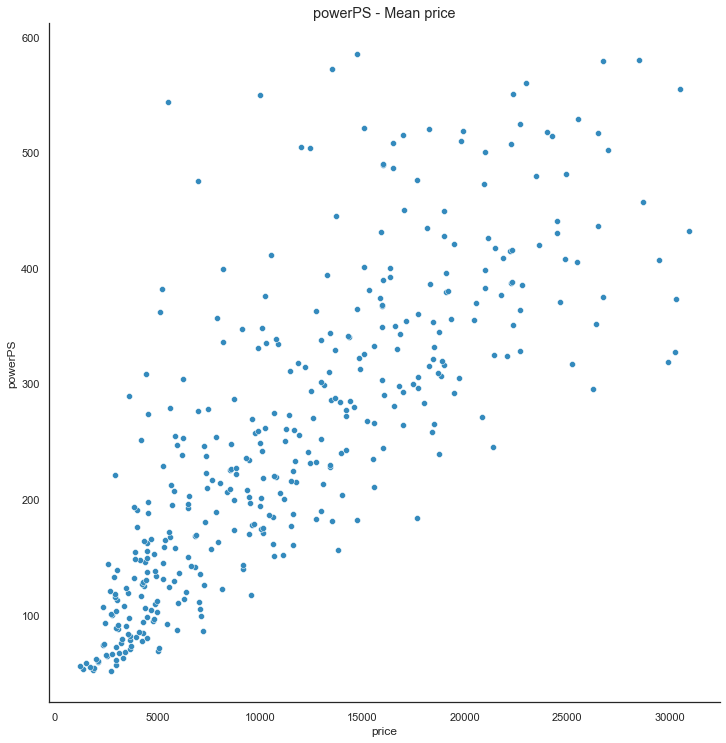

In [32]:
dfg_ = data.groupby(['powerPS'], as_index=False)['price'].mean()
sns.relplot(y='powerPS', x='price', data=dfg_, height=10, aspect=1)
plt.title('powerPS - Mean price')
plt.show()

Зависимость линейная - ничего необычного.

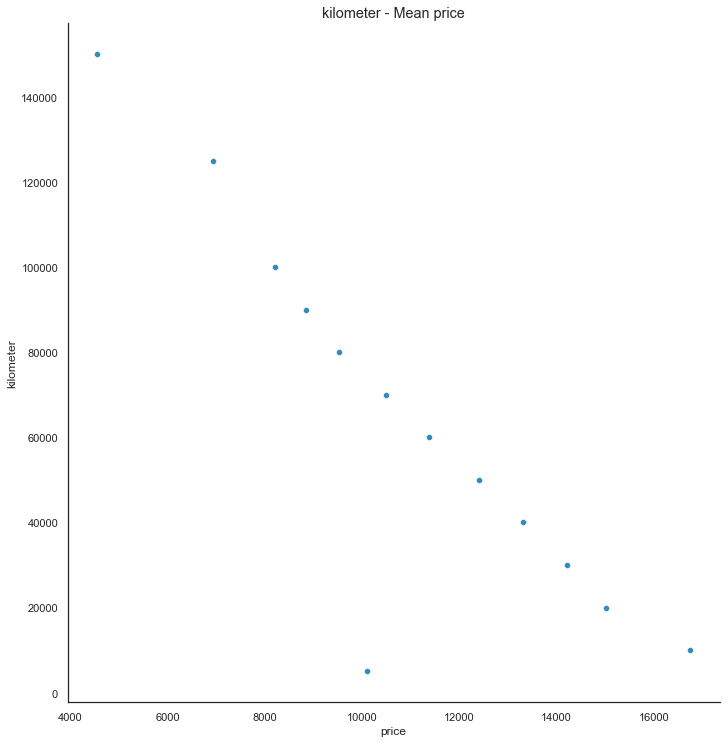

In [34]:
dfg_ = data.groupby(['kilometer'], as_index=False)['price'].mean()
sns.relplot(y='kilometer', x='price', data=dfg_, height=10, aspect=1)
plt.title('kilometer - Mean price')
plt.show()

Тоже линейная зависимость. Однако присутствует одна точка, которая сильно выбивается из общей тенденции. Но, возможно, это связано с другими характеристиками автомобиля.

In [35]:
other.append('rarity')

# Работа с категориальными признаками.

Теперь разберемся с категориальными признаками. Можно построить графики зависимости между средней ценой и брендом/типом авто/типом топлива. Ну и по приколу построим то же самое с моделью автомобиля.\
*Кстати, касаемо преобразования данных: можно объединить бренд и модель в одну колонку. Посмотрим на графики и решим, стоит ли это делать*.

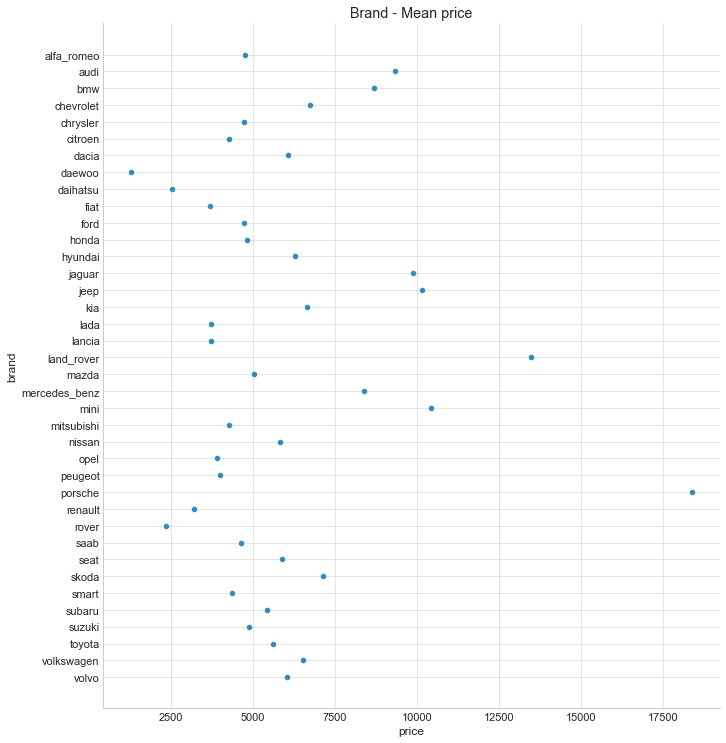

In [36]:
plt.style.use('seaborn-whitegrid')
dfg_ = data.groupby(['brand'], as_index=False)['price'].mean()

sns.relplot(y='brand', x='price', data=dfg_, height=10, aspect=1)
plt.title('Brand - Mean price')
plt.show()

Самые дорогие машины - Porsche и Land Rover, а Daewoo, похоже, вообще для плебеев (даже у Лады средний ценник выше).

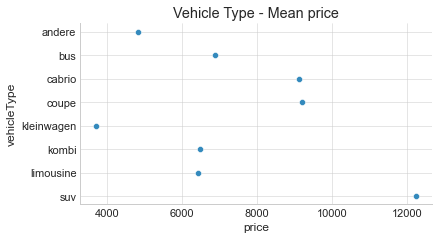

In [37]:
dfg_ = data.groupby(['vehicleType'], as_index=False)['price'].mean()

sns.relplot(y='vehicleType', x='price', data=dfg_, height=3, aspect=2)
plt.title('Vehicle Type - Mean price')
plt.show()

Не знаю, что такое SUV, но такие машины самые дорогие.

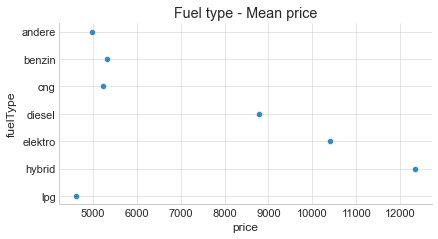

In [38]:
dfg_ = data.groupby(['fuelType'], as_index=False)['price'].mean()

sns.relplot(y='fuelType', x='price', data=dfg_, height=3, aspect=2)
plt.title('Fuel type - Mean price')
plt.show()

Гибридные и электрокары - самые дорогие, самые дешевые на газу (lpg), что в целом логично.

In [39]:
dfg_ = data.groupby(['model'], as_index=False)['price'].mean()
dfg_.head()

,model,price
0,100,2209.617284
1,145,1540.368421
2,147,2537.050761
3,156,1904.240541
4,159,7476.431818


Все же я считаю нужным объединить бренд и модель в одну колонку. Но для начала проверим, можно ли выбросить колонку с брендом (проверим, может ли быть такое, что у двух брендов есть модели автомобилей с одинаковыми названиями).

In [40]:
(pd.pivot_table(data[['model', 'brand']], index=['model', 'brand']).shape == len(data['model'].unique()))

False

Значит, пересечения существуют, следовательно, удалить столбец бренда мы не можем.

In [41]:
# data['brand'] += ' ' + data['model']
data.drop(columns='model', inplace=True)
data.head()

,brand,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,rarity
0,volkswagen,kleinwagen,0,benzin,0,75,150000,177,1500,0
1,skoda,kleinwagen,0,diesel,0,69,90000,93,3600,0
2,bmw,limousine,0,benzin,1,102,150000,246,650,1
3,peugeot,cabrio,0,benzin,0,109,150000,140,2200,0
4,mazda,limousine,0,benzin,0,105,150000,136,2000,0


In [42]:
categorical.remove('model')
y = data['price']
x = data[categorical + numeric + other].copy()
x['bias'] = 1
x.head()

,brand,vehicleType,fuelType,powerPS,kilometer,autoAgeMonths,notRepairedDamage,gearbox,rarity,bias
0,volkswagen,kleinwagen,benzin,75,150000,177,0,0,0,1
1,skoda,kleinwagen,diesel,69,90000,93,0,0,0,1
2,bmw,limousine,benzin,102,150000,246,1,0,1,1
3,peugeot,cabrio,benzin,109,150000,140,0,0,0,1
4,mazda,limousine,benzin,105,150000,136,0,0,0,1


In [43]:
# Фиксированный random_seed => детерменированный результат
y = pd.DataFrame(y).sample(frac=1, random_state=10)
x = x.sample(frac=1, random_state=10)

Разделим выборку на обучающую, валидационную и тестирущую.

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)
x.shape

(227808, 59)

In [45]:
y = y.values.reshape((y.shape[0],))
type(x), type(y), y.shape

(scipy.sparse.csr.csr_matrix, numpy.ndarray, (227808,))

In [46]:
X_train, X_valid, X_test = np.split(x.A, [int(.8 * x.shape[0]), int(.9 * x.shape[0])])
X_train.shape[0] / x.shape[0], X_valid.shape[0] / x.shape[0], X_test.shape[0] / x.shape[0]

(0.7999982441354123, 0.10000087793229386, 0.10000087793229386)

In [47]:
y_train, y_valid, y_test = np.split(y, [int(.8 * y.shape[0]), int(.9 * y.shape[0])])
y_train.shape, y_valid.shape, y_test.shape

((182246,), (22781,), (22781,))

In [48]:
from scipy.sparse import csr_matrix
y_train = np.log1p(y_train)
y_valid = np.log1p(y_valid)
y_test = np.log1p(y_test)

X_train = csr_matrix(X_train)
X_valid = csr_matrix(X_valid)
X_test = csr_matrix(X_test)

In [49]:
y_train.shape, y_valid.shape, y_test.shape, X_train.shape, X_valid.shape, X_test.shape

((182246,), (22781,), (22781,), (182246, 59), (22781, 59), (22781, 59))

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [51]:
lambdas_grid = np.logspace(-1, -0.1, 20)
GD_list = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'some name',
    'kwargs': {
        'dimension': X_valid.shape[1],
        'lambda_': None
    }
}

class parameters:
    def __init__(self, history, lambda_, mu=None, loss=None, save_history=True):
        self.history = None
        if save_history == True:
            self.history = history
        self.q_iters = len(history)
        self.loss = loss
        self.lambd = lambda_
        self.mu = mu
        
    def __lt__(self, other):
        assert (not np.isnan(self.loss) and not np.isnan(other.loss))
        if self.loss != other.loss:
            return (self.loss < other.loss)
        if self.q_iters != other.q_iters:
            return (self.q_iters < other.q_iters)
        return False
    
    def alert(self):
        print('Iterations:', self.q_iters)
        print('Final loss:', self.loss)
        print('Lambda:', self.lambd)
        if self.mu != None:
            print('Mu:', self.mu)

methods = {
    'full': [],
    'stochastic': [],
    'momentum': [],
    'adam': []
}

for descent_name in GD_list:
    print('Now it comes for', descent_name, 'GD')
    descent_config['descent_name'] = descent_name
    for lbd in lambdas_grid:
        descent_config['kwargs']['lambda_'] = lbd
        regression = LinearRegression(descent_config=descent_config)

        regression.fit(X_train, y_train)

        methods[descent_name].append( 
            parameters(regression.loss_history, lbd,
                       loss=regression.calc_loss(X_valid, y_valid),
                       save_history=False)
        )

print('Done')

Now it comes for full GD
Now it comes for stochastic GD
Now it comes for momentum GD
Now it comes for adam GD
Done


In [52]:
opts = {}

for descent_name in GD_list:
    opts[descent_name] = sorted(methods[descent_name])[0].lambd
    
print(opts)

{'full': 0.7943282347242815, 'stochastic': 0.7943282347242815, 'momentum': 0.7122485584859914, 'adam': 0.7943282347242815}


In [53]:
def R_sqr(MSE, y):
    d = np.sum( (y - np.mean(y)) ** 2 )
    return (d - y.shape[0] * MSE) / d

class check:
    def __init__(self, q_iters, loss_train, loss_test, train_Rsqr, test_Rsqr, history=None):
        self.q_iters = q_iters
        self.loss_train = loss_train
        self.loss_test = loss_test
        self.train_Rsqr = train_Rsqr
        self.test_Rsqr = test_Rsqr
        self.history = history
    
    def alert(self):
        print('Iterations:', self.q_iters)
        print('Train loss:', self.loss_train)
        print('Test loss:', self.loss_test)
        print('Det Coeff Train:', self.train_Rsqr)
        print('Det Coeff Test:', self.test_Rsqr)

descent_config = {
    'descent_name': 'some name',
    'kwargs': {
        'dimension': X_valid.shape[1],
        'lambda_': None
    }
}

for descent_name in GD_list:
    print('Now it comes for', descent_name, 'GD')
    descent_config['descent_name'] = descent_name
    descent_config['kwargs']['lambda_'] = opts[descent_name]
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)

    train_loss = regression.calc_loss(X_train, y_train)
    test_loss = regression.calc_loss(X_test, y_test)
    methods[descent_name] = check(len(regression.loss_history),
                                  train_loss,
                                  test_loss,
                                  R_sqr(train_loss, y_train),
                                  R_sqr(test_loss, y_test)
                            )
        
print('Done')

Now it comes for full GD
Now it comes for stochastic GD
Now it comes for momentum GD
Now it comes for adam GD
Done


In [54]:
for descent_name in GD_list:
    methods[descent_name].alert()
    print()

Iterations: 106
Train loss: 0.5049255951127088
Test loss: 0.4867680637178072
Det Coeff Train: 0.48254141878924484
Det Coeff Test: 0.49943828782338945

Iterations: 301
Train loss: 0.42436034028951014
Test loss: 0.40750158669502057
Det Coeff Train: 0.5651064201661101
Det Coeff Test: 0.5809509555889895

Iterations: 126
Train loss: 0.270957392423824
Test loss: 0.2604061228829711
Det Coeff Train: 0.7223170518402806
Det Coeff Test: 0.7322146943330696

Iterations: 103
Train loss: 0.2406623594971497
Test loss: 0.2360310310734721
Det Coeff Train: 0.7533640514531063
Det Coeff Test: 0.7572805082187115



Отсюда, кстати, видим, что лучше всех сошелся Adam.

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

Now it comes for full GD
Now it comes for stochastic GD
Now it comes for momentum GD
Now it comes for adam GD
Done


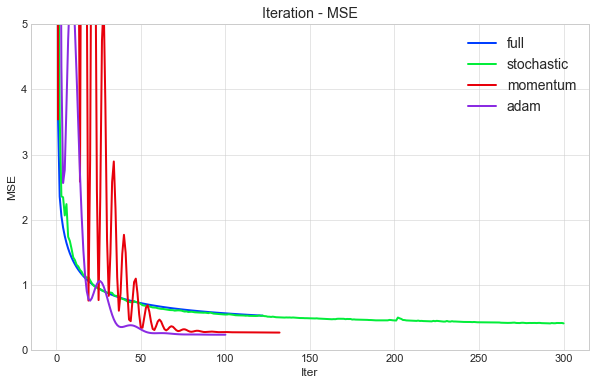

In [55]:
descent_config = {
    'descent_name': 'some name',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': None
    }
}

plt.style.use('seaborn-bright')
for descent_name in GD_list:
    print('Now it comes for', descent_name, 'GD')
    descent_config['descent_name'] = descent_name
    descent_config['kwargs']['lambda_'] = opts[descent_name]
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    
    plt.plot(regression.loss_history, label=descent_name, linewidth=2)
print('Done')

plt.xlabel('Iter')
plt.ylabel('MSE')
plt.ylim([0, 5])
plt.title('Iteration - MSE')
plt.legend(shadow=False, fontsize=14)
plt.show()

* SGD со стандартным размером батча очень долго сходится - видно, после 100-го шага значение ошибки меняется малозаметно, оно почти достигает стандартного значения `tolerance`;
* В Momentum колебания имеют высокую амплитуду и резкий характер;
* Adam очень похож на Momentum, но засчет адаптивности колебания затухают быстрее, и метод сходится неплохо;
* Стандартный градиентный спуск имеет достаточно плавный график, что логично: мы высчитываем градиент по всей выборке. При этом метод сошелся за число шагов, сравнимое с числом шагов у Adam.
Дольше всех сходится SGD, ему необходимо больше шагов. Быстрее всех - Adam и обычный GD.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [56]:
import time
from datetime import datetime
batch_sizes = np.arange(5, 500, 10)
k = 8

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': opts['stochastic'],
        'batch_size': None
    }
}

runtime = []
iterations = []

# start_time = datetime.now()
for bs in batch_sizes:
    iters = 0
    seconds = 0.0
    descent_config['kwargs']['batch_size'] = bs
    for i in range(k):
        regression = LinearRegression(descent_config=descent_config)
        start_time = datetime.now()
        regression.fit(X_train, y_train)
        seconds += (datetime.now() - start_time).total_seconds()
        iters += len(regression.loss_history)
        
    iters /= k
    seconds /= k
    runtime.append(seconds)
    iterations.append(iters)
print('Done')

Done


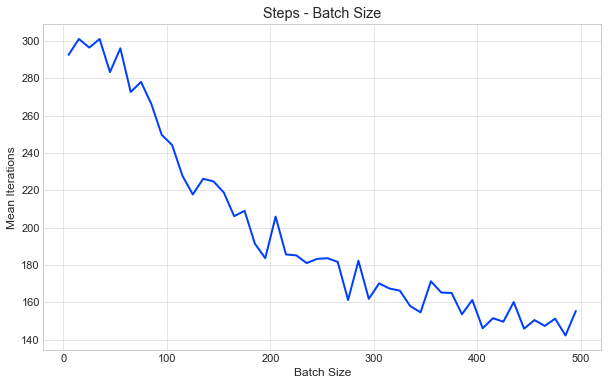

In [57]:
plt.plot(batch_sizes, iterations, linewidth=2)
plt.xlabel('Batch Size')
plt.ylabel('Mean Iterations')
plt.title('Steps - Batch Size')
plt.show()

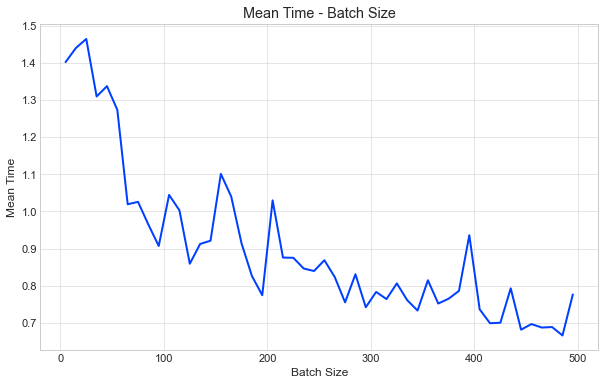

In [58]:
plt.plot(batch_sizes, runtime, linewidth=2)
plt.xlabel('Batch Size')
plt.ylabel('Mean Time')
plt.title('Mean Time - Batch Size')
plt.show()

С увеличением размера батча уменьшается как и среднее время сходимости, так и среднее число итераций. Это следует из зависимости между длительностью сходимости и числом шагов. При большом батче один шаг мы делаем дольше, но в целом шагов делаем меньше и, как видно по графику, последний пункт влияет сильнее.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Так как градиент $f(x) = \|x\|^2$ равен $2w$, то новый градиент функционала будет выглядеть так:
$$\nabla_w Q = \frac{-2}{l}X^T (y - Xw) + \mu w $$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:
https://contest.yandex.ru/contest/29933/run-report/55442751/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [60]:
methods = {
    'full': [],
    'stochastic': [],
    'momentum': [],
    'adam': []
}

descent_config = {
    'descent_name': None,
    'regularized': True,
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': None
    }
}

mus_grid = np.logspace(-3.5, -2, 20)

for descent_name in GD_list:
    print('Now it comes for', descent_name, 'GD')
    descent_config['descent_name'] = descent_name
    for lbd in lambdas_grid:
        for mu in mus_grid:
            descent_config['kwargs']['lambda_'] = lbd
    
            regression = LinearRegression(descent_config=descent_config)
            regression.descent.mu = mu
            if descent_name == 'stochastic':
                regression.descent.batch_size = 420
                
            regression.fit(X_train, y_train)

            methods[descent_name].append( 
                parameters(regression.loss_history, lbd,
                           loss=regression.calc_loss(X_valid, y_valid), mu=mu)
            )

print('Done')

Now it comes for full GD
Now it comes for stochastic GD
Now it comes for momentum GD
Now it comes for adam GD
Done


In [61]:
opts_reg = {}
for descent_name in GD_list:
    opts_reg[descent_name] = sorted(methods[descent_name])[0]
    opts_reg[descent_name].alert()
    print()

Iterations: 101
Final loss: 0.49313176046259233
Lambda: 0.7943282347242815
Mu: 0.0011288378916846883

Iterations: 142
Final loss: 0.43718012129122813
Lambda: 0.7943282347242815
Mu: 0.00031622776601683794

Iterations: 247
Final loss: 0.25521161307757445
Lambda: 0.7943282347242815
Mu: 0.00031622776601683794

Iterations: 89
Final loss: 0.2401849743993338
Lambda: 0.7943282347242815
Mu: 0.00031622776601683794



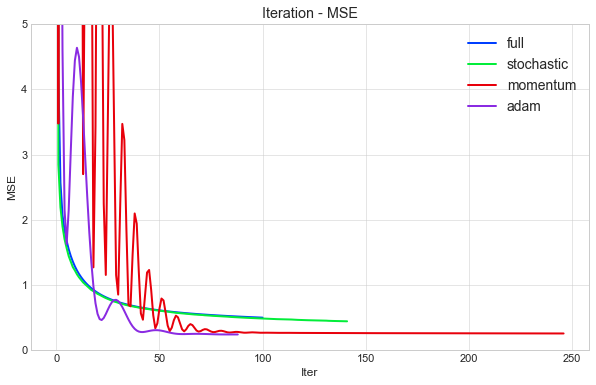

In [62]:
for descent_name in GD_list:    
    plt.plot(opts_reg[descent_name].history, label=descent_name, linewidth=2)
plt.xlabel('Iter')
plt.ylabel('MSE')
plt.ylim([0, 5])
plt.title('Iteration - MSE')
plt.legend(shadow=False, fontsize=14)
plt.show()

Пока что я вижу, что начиная с 150 эпохи для каждого метода значение ошибки практически перестает меняться.

In [63]:
descent_config = {
    'descent_name': None,
    'kwargs': {
        'dimension': X_valid.shape[1],
        'lambda_': None
    }
}

methods_reg = {}
methods_unreg = {}

for descent_name in GD_list:
    print('Now it comes for', descent_name, 'GD')
    
    descent_config['descent_name'] = descent_name
    descent_config['kwargs']['lambda_'] = opts[descent_name]
    
    descent_config['regularized'] = False
    model_unreg = LinearRegression(descent_config=descent_config)
    
    descent_config['regularized'] = True
    descent_config['kwargs']['lambda_'] = opts_reg[descent_name].lambd
    model_reg = LinearRegression(descent_config=descent_config)
    model_reg.descent.mu = opts_reg[descent_name].mu
    
    if descent_name == 'stochastic':
        model_unreg.descent.batch_size = 420
        model_reg.descent.batch_size = 420
    
    model_unreg.fit(X_train, y_train)
    model_reg.fit(X_train, y_train)
    
    def foo(model):
        train_loss = model.calc_loss(X_train, y_train)
        test_loss = model.calc_loss(X_test, y_test)
        return check(len(model.loss_history),
                                      train_loss,
                                      test_loss,
                                      R_sqr(train_loss, y_train),
                                      R_sqr(test_loss, y_test),
                                      model.loss_history
                                )
    
    methods_reg[descent_name] = foo(model_reg)
    methods_unreg[descent_name] = foo(model_unreg)
        
print('Done')

Now it comes for full GD
Now it comes for stochastic GD
Now it comes for momentum GD
Now it comes for adam GD
Done


Нарисуем графики.

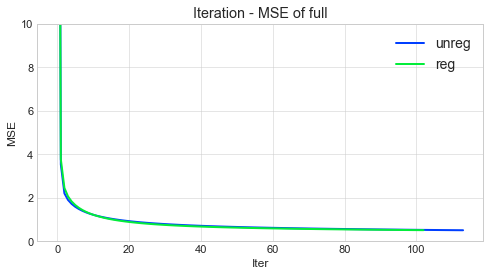

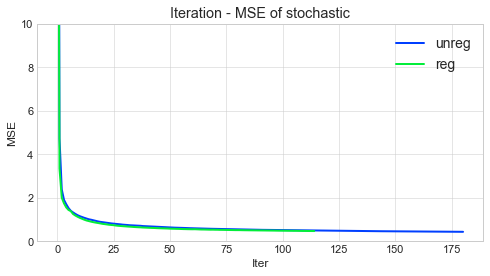

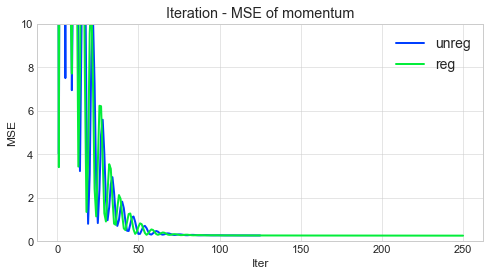

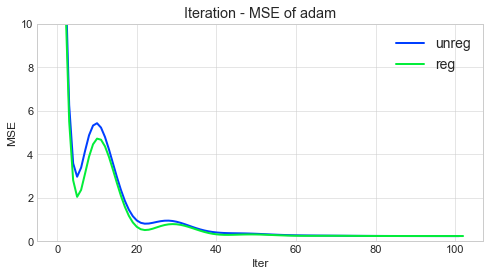

In [64]:
for descent_name in GD_list:
    fig, ax = plt.subplots(figsize=(8, 4))
    
    plt.plot(methods_unreg[descent_name].history, label='unreg', linewidth=2)
    plt.plot(methods_reg[descent_name].history, label='reg', linewidth=2)
    
    plt.xlabel('Iter')
    plt.ylabel('MSE')
    plt.ylim([0, 10])
    plt.title('Iteration - MSE of ' + descent_name)
    plt.legend(shadow=False, fontsize=14)
    plt.show()

Выведем информацию по ошибкам и $R^2$.

In [65]:
rg = methods_reg
urg = methods_unreg

def vizualize(indexes, columns_list, mdl_1, mdl_2):
    output_data = {columns_list[0]: [mdl_1[m].q_iters for m in GD_list],
                   columns_list[1]: [mdl_2[m].q_iters for m in GD_list],
                   columns_list[2]: [mdl_1[m].loss_train for m in GD_list], 
                   columns_list[3]: [mdl_2[m].loss_train for m in GD_list],
                   columns_list[4]: [mdl_1[m].loss_test for m in GD_list], 
                   columns_list[5]: [mdl_2[m].loss_test for m in GD_list],
                   columns_list[6]: [mdl_1[m].train_Rsqr for m in GD_list],
                   columns_list[7]: [mdl_2[m].train_Rsqr for m in GD_list],
                   columns_list[8]: [mdl_1[m].test_Rsqr for m in GD_list],
                   columns_list[9]: [mdl_2[m].test_Rsqr for m in GD_list],
                }

    df = pd.DataFrame(index=indexes, data=output_data)
    return df
    
vizualize(['full', 'stochastic', 'momentum', 'adam'],
          ['unreg_it', 'reg_it', 'unreg_train_loss', 'reg_train_loss', 'unreg_test_loss', 
 'reg_test_loss', 'unreg_train_coef', 'reg_train_coef', 'unreg_test_coef', 'reg_test_coef'], urg, rg).head()

,unreg_it,reg_it,unreg_train_loss,reg_train_loss,unreg_test_loss,reg_test_loss,unreg_train_coef,reg_train_coef,unreg_test_coef,reg_test_coef
full,114,103,0.508812,0.512528,0.490873,0.493344,0.478558,0.474750,0.495217,0.492676
stochastic,181,115,0.436282,0.472142,0.422356,0.456995,0.552889,0.516138,0.565675,0.530055
momentum,126,251,0.268228,0.259977,0.259397,0.250568,0.725114,0.733570,0.733252,0.742331
adam,102,103,0.239951,0.242323,0.235072,0.237080,0.754093,0.751662,0.758266,0.756202


In [66]:
print(model_reg.descent.w)

[ 2.39521261  2.81876213  2.79764521  2.4085264   2.13490118  2.32845796
  2.22739048  1.68910786  2.06189548  2.34913004  2.40072726  2.56263855
  2.30828307  2.5402563   2.50374263  2.25096896  1.63634735  2.12811351
  2.76705895  2.42062474  2.78019593  2.91988992  2.27337159  2.42299061
  2.42055828  2.3354936   3.03403781  2.25747252  1.84515469  2.33354643
  2.56116848  2.71072338  2.34185078  2.34077167  2.43400431  2.64576251
  2.76008883  2.56492092  2.78798859  2.95713167  3.17328239  2.97951687
  2.67199393  2.67541097  2.74769814  3.10019397  1.31855423  2.8404868
  2.72837451  3.11304477  1.32907276  2.61151587  2.82809629  0.31402705
 -0.28218193 -0.41540151 -0.49776839  0.09574219 -0.00479662]


In [67]:
print(model_unreg.descent.w)

[ 2.71123447  3.07653815  3.05402996  2.75300989  2.47081603  2.60769868
  2.62152372  2.21846458  2.53774702  2.63020721  2.66726174  2.86859909
  2.61516348  3.00092502  2.9840567   2.56869395  2.37550821  2.67356632
  3.2764245   2.70524928  3.03251359  3.22619278  2.58004037  2.72188325
  2.68132454  2.61326166  3.43309039  2.52767717  2.41879768  2.80902669
  2.84338225  2.99230345  2.61150029  2.79721561  2.78032525  2.92555057
  3.01465882  2.86244479  2.79432074  2.90104022  3.12601925  2.93844617
  2.60990491  2.62121823  2.69501128  2.99870857  2.60399999  2.62964329
  2.75072619  2.90862228  2.77810622  2.8431769   2.63664246  0.30859434
 -0.27181595 -0.4164959  -0.50557399  0.10709283 -0.04252651]


* В основном регуляризация уменьшает ошибку на тренировочной и тестовой выборках, что круто;
* Увеличивается коэффициент детерминации;
* Веса становятся меньше (чем больше $\mu$, тем более заметно).

Вывод: конкретно в нашей задаче L2 имеет место быть.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$L(w) = \sum\limits_{i} \log\left(\cosh((Xw)_i - y_i)\right)$ - функция из векторов в скаляры, значит, ее дифференциал будет иметь вид $\nabla_w L(w)^T dw$. Посчитмаем производную по одному компоненту суммы. Будем считать, что $log \sim ln$. $j \in \{1, \ldots, d \}$.

$$d_{w_j} L = d_{w_j} [ \log\left(\cosh(X w - y)\right) ]$$

$$u = log(v); \\
  v = \cosh(t); \\
  t = Xw - y$$
  
$$d_{w_j} L = u' dv = u' v' dt = u' v' t' d_{w_j}$$

$$
    u'_v = \frac{1}{v} = \frac{1}{cosh(X w - y)}; \\
    v'_t = sinh(t) = sinh(X w - y);
$$

$$
    t'_{w_j} = \begin{bmatrix} 
    X_{11} w_1 + \ldots + X_{1d} w_d - y_1 \\
    \ldots \\
    X_{\ell 1} w_1 + \ldots + X_{\ell d} w_d - y_\ell
    \end{bmatrix}_{dw_j} = 
    \begin{bmatrix}
        X_{1j} \\
        \ldots \\
        X_{\ell j}
    \end{bmatrix} = X^j
$$

Далее несложно понять, что,  $$ \nabla_w L = X^T tanh(Xw - y) $$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [68]:
from descents import LossFunction

methods_lc = {}
for descent_name in GD_list:
    print('Now it comes for', descent_name, 'GD')
    
    descent_config['descent_name'] = descent_name
    descent_config['kwargs']['lambda_'] = opts[descent_name]
    model_lc = LinearRegression(descent_config=descent_config)
    model_lc.descent.loss_function = LossFunction.LogCosh
    
    if descent_name == 'stochastic':
        model_lc.descent.batch_size = 420
        
    model_lc.fit(X_train, y_train)

    train_loss = model_lc.calc_loss(X_train, y_train)
    test_loss = model_lc.calc_loss(X_test, y_test)
    methods_lc[descent_name] = check(len(model_lc.loss_history),
                                  train_loss,
                                  test_loss,
                                  R_sqr(train_loss, y_train),
                                  R_sqr(test_loss, y_test),
                                  model_lc.loss_history
                            )
        
print('Done')

Now it comes for full GD
Now it comes for stochastic GD
Now it comes for momentum GD
Now it comes for adam GD
Done


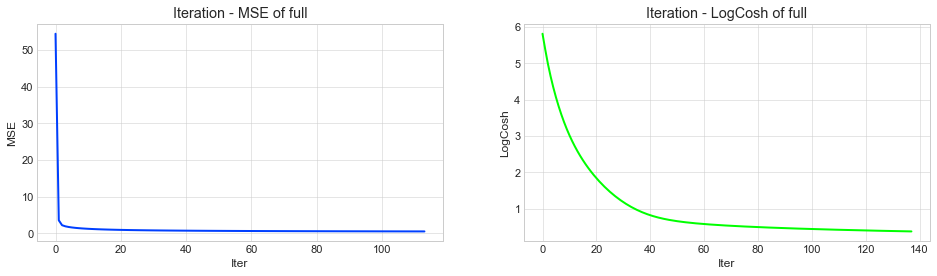

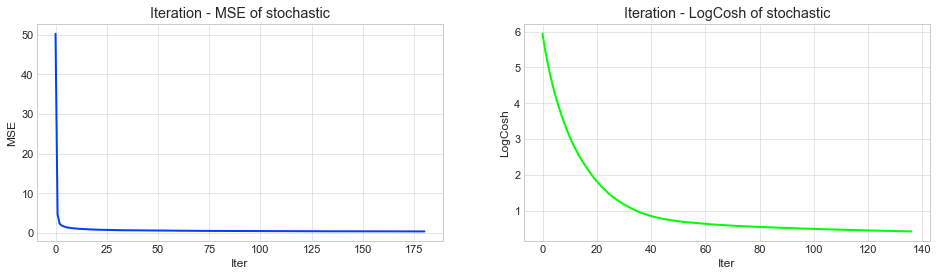

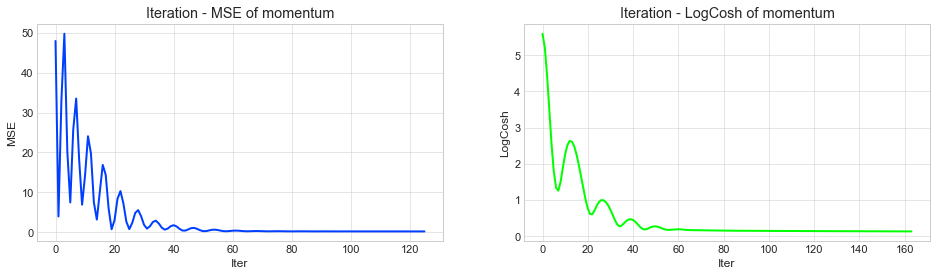

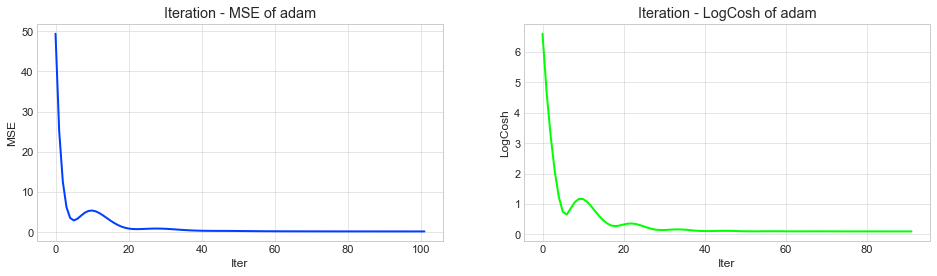

In [69]:
for descent_name in GD_list:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    
    ax1.plot(methods_unreg[descent_name].history, label='MSE', linewidth=2)
    ax2.plot(methods_lc[descent_name].history, label='LogCosh', color='lime', linewidth=2)
    
    ax1.set_xlabel('Iter')
    ax2.set_xlabel('Iter')
    ax1.set_ylabel('MSE')
    ax2.set_ylabel('LogCosh')
    #plt.ylim([0, 10])
    ax1.set_title('Iteration - MSE of ' + descent_name)
    ax2.set_title('Iteration - LogCosh of ' + descent_name)
    #plt.legend(shadow=False, fontsize=14)
    plt.show()

Видим, что `LogCosh` ведет себя более плавно, а также модель с этой функией потерь достигает лучшего значения $R^2$.

In [70]:
vizualize(['full', 'stochastic', 'momentum', 'adam'],
          ['unreg_it', 'reg_it', 'unreg_train_loss', 'reg_train_loss', 'unreg_test_loss', 
 'reg_test_loss', 'unreg_train_coef', 'reg_train_coef', 'unreg_test_coef', 'reg_test_coef'], urg, methods_lc).head()

,unreg_it,reg_it,unreg_train_loss,reg_train_loss,unreg_test_loss,reg_test_loss,unreg_train_coef,reg_train_coef,unreg_test_coef,reg_test_coef
full,114,138,0.508812,0.375954,0.490873,0.364675,0.478558,0.614714,0.495217,0.624991
stochastic,181,137,0.436282,0.419840,0.422356,0.410423,0.552889,0.569739,0.565675,0.577947
momentum,126,164,0.268228,0.132091,0.259397,0.127616,0.725114,0.864631,0.733252,0.868768
adam,102,92,0.239951,0.097042,0.235072,0.094777,0.754093,0.900549,0.758266,0.902538


### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [71]:
GD_list.append('adamax')

Now it comes for adamax GD
Done


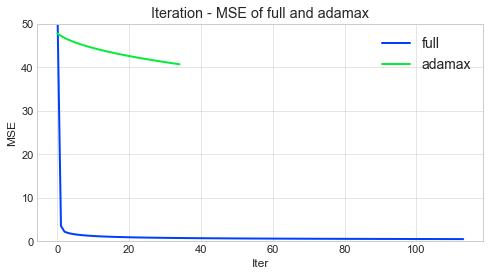

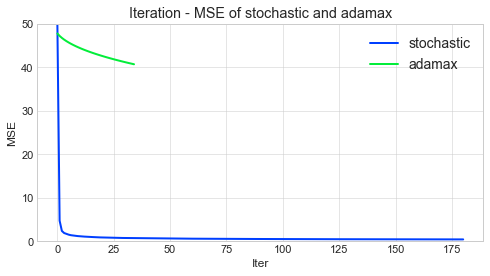

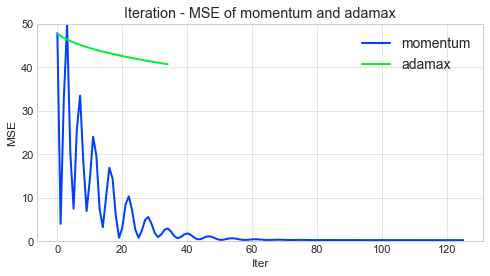

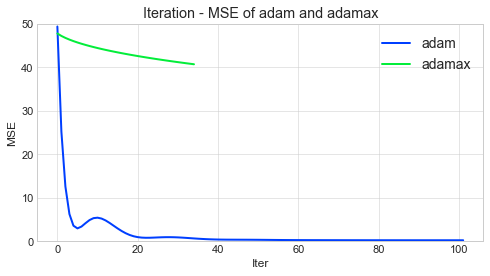

In [72]:
print('Now it comes for adamax GD')
descent_config['descent_name'] = 'adamax'
model_adamax = LinearRegression(descent_config=descent_config)

model_adamax.fit(X_train, y_train)

train_loss = model_adamax.calc_loss(X_train, y_train)
test_loss = model_adamax.calc_loss(X_test, y_test)
urg['adamax'] = check(len(model_adamax.loss_history),
                        train_loss,
                        test_loss,
                        R_sqr(train_loss, y_train),
                        R_sqr(test_loss, y_test),
                        model_adamax.loss_history
                )
        
print('Done')


for descent_name in GD_list[0:-1]:
    fig, ax = plt.subplots(figsize=(8, 4))
    
    plt.plot(urg[descent_name].history, label=descent_name, linewidth=2)
    plt.plot(urg['adamax'].history, label='adamax', linewidth=2)
    
    plt.xlabel('Iter')
    plt.ylabel('MSE')
    plt.ylim([0, 50])
    plt.title('Iteration - MSE of ' + descent_name + ' and adamax')
    plt.legend(shadow=False, fontsize=14)
    plt.show()

In [73]:
urg['adamax'].history

[47.783227961756246,
 47.223343479322324,
 46.769923331968585,
 46.379965046233494,
 46.033312756312235,
 45.7186258535532,
 45.42878125669471,
 45.15896071777679,
 44.90572593759198,
 44.66652192848255,
 44.439388806698005,
 44.222784196178665,
 44.01546842622635,
 43.816427359992325,
 43.62481880015554,
 43.43993422732458,
 43.261170830476054,
 43.08801063687551,
 42.92000465687584,
 42.75676064572736,
 42.597933522802876,
 42.44321777564791,
 42.29234136857706,
 42.145060807072845,
 42.00115710089316,
 41.86043243373169,
 41.72270739399644,
 41.58781865535948,
 41.455617020920116,
 41.325965763662225,
 41.198739210125765,
 41.073821525089485,
 40.95110566344407,
 40.830492461956595,
 40.7118898487387]

In [74]:
def vizualize_mini(indexes, columns_list, mdl_1):
    output_data = {columns_list[0]: [mdl_1[m].q_iters for m in GD_list],
                   columns_list[1]: [mdl_1[m].loss_train for m in GD_list], 
                   columns_list[2]: [mdl_1[m].loss_test for m in GD_list], 
                   columns_list[3]: [mdl_1[m].train_Rsqr for m in GD_list],
                   columns_list[4]: [mdl_1[m].test_Rsqr for m in GD_list]
                }

    df = pd.DataFrame(index=indexes, data=output_data)
    return df
    
vizualize_mini(GD_list, ['it', 'train_loss', 'test_loss', 'train_coef', 'test_coef'], urg).head()

,it,train_loss,test_loss,train_coef,test_coef
full,114,0.508812,0.490873,0.478558,0.495217
stochastic,181,0.436282,0.422356,0.552889,0.565675
momentum,126,0.268228,0.259397,0.725114,0.733252
adam,102,0.239951,0.235072,0.754093,0.758266
adamax,35,40.711890,40.627574,-40.722418,-40.778846


Не получилось с Адамаксом - не успел :с

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: